In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from yellowbrick.contrib.scatter import ScatterVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, adjusted_rand_score
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.manifold import TSNE

In [ ]:
data =pd.read_csv('https://raw.githubusercontent.com/bachir151/Projet-openclassrooms/master/P4/table_segmentation.csv')
data.rename(columns={'Nb_inactive_days':'recency'}, inplace=True) 
data.head()

,customer_unique_id,recency,frequency,montant,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,0,0,0,0,0,0,0,0,1


In [ ]:
data.shape

(92493, 16)

Je vais découper le jeu de données en trois tableau 

In [ ]:
data.columns.to_list()

['customer_unique_id',
 'recency',
 'frequency',
 'montant',
 'note_com',
 'frais_livraison',
 'temps_moyen_livraison',
 'Alimentation et Boissons',
 'Auto et Moto',
 'Autres',
 'Livres et Médias',
 'Maison et Jardin',
 'Mode',
 'Santé et Beauté',
 'Sports et Loisirs',
 'Électronique']

In [ ]:
segment_1 = data[['customer_unique_id','recency','frequency','montant']]  # Correspond à table RFM
segment_2 = data[['customer_unique_id','recency','frequency','montant','note_com','frais_livraison','temps_moyen_livraison']]
segment_3 = data

In [ ]:
segment_1.head()

,customer_unique_id,recency,frequency,montant
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19
2,0000f46a3911fa3c0805444483337064,536,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89


In [ ]:
segment_2.head()

,customer_unique_id,recency,frequency,montant,note_com,frais_livraison,temps_moyen_livraison
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0


In [ ]:
segment_3.head()

,customer_unique_id,recency,frequency,montant,note_com,frais_livraison,temps_moyen_livraison,Alimentation et Boissons,Auto et Moto,Autres,Livres et Médias,Maison et Jardin,Mode,Santé et Beauté,Sports et Loisirs,Électronique
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,12.00,6.0,0,0,0,0,1,0,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,8.29,3.0,0,0,0,0,0,0,1,0,0
2,0000f46a3911fa3c0805444483337064,536,1,86.22,3.0,17.22,25.0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,320,1,43.62,4.0,17.63,20.0,0,0,0,0,0,0,0,0,1
4,0004aac84e0df4da2b147fca70cf8255,287,1,196.89,5.0,16.89,13.0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics.cluster import adjusted_rand_score


#Méthode Agglomerative clustering

- Segementeer les données de façon hiérarchique :

   1) On consière que chaque point est un cluster 

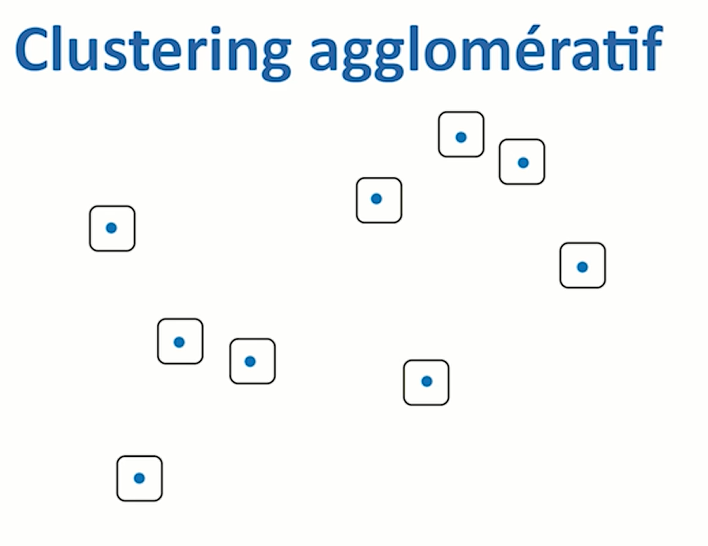

2) On cherche les deux clusters les plus proches  et on les agglomère en un seul

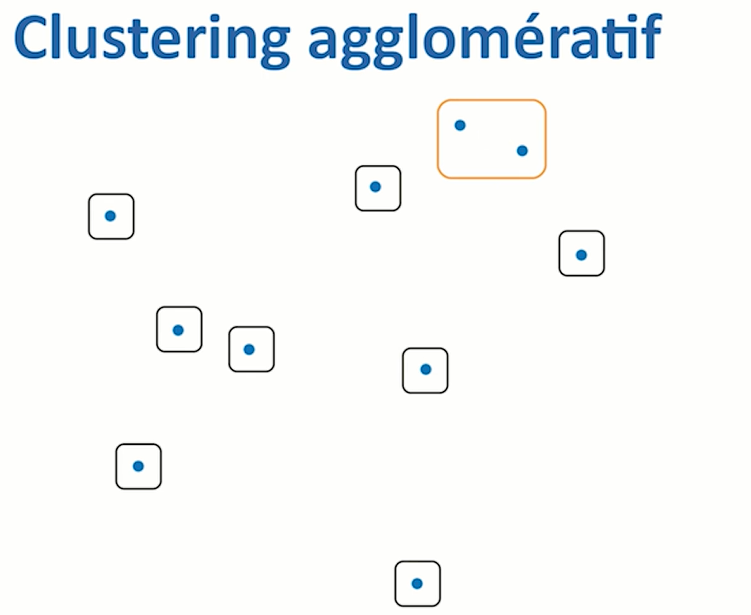

3) On répéte l'opération jusqu'à former un seul grand cluster 

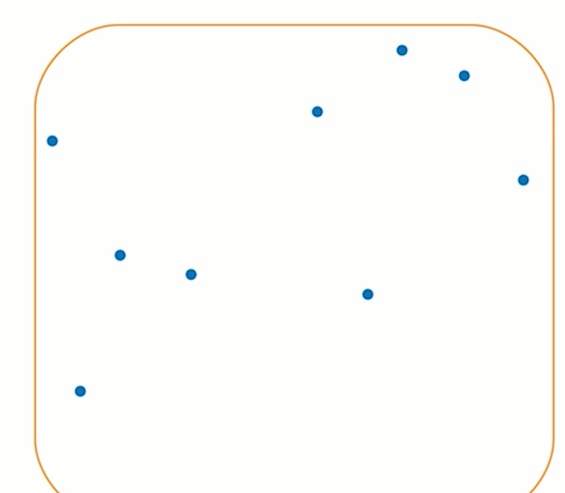

On peut visualiser les clusters obtenus à l'aide dee dendogramme

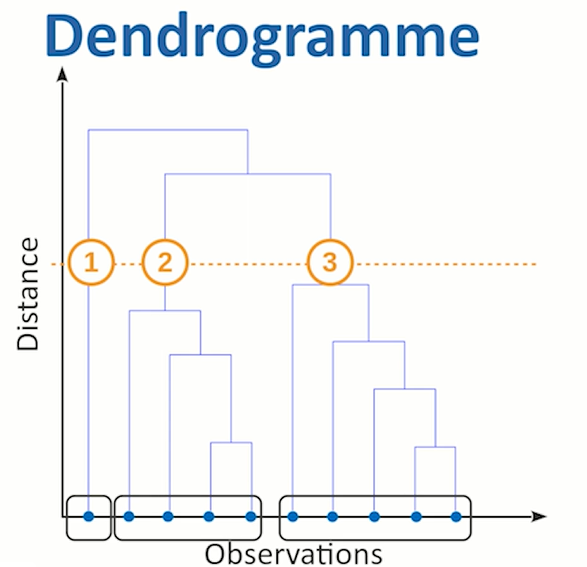

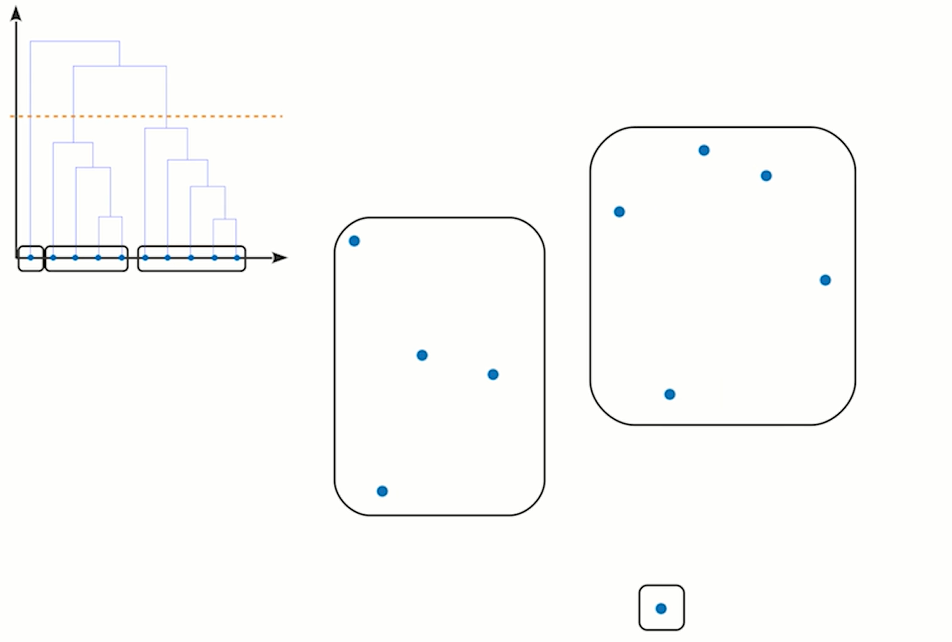

Explication

# Agglomerative pour la table **segment_1**

In [ ]:
# StandardScaler
scaler = StandardScaler()

In [ ]:
segment_1_copy=segment_1.drop(['customer_unique_id'], axis=1).copy()
segment_1_sample_x = segment_1_copy.sample(frac = .30, random_state = 42) # faire le cluster avec l'ensemble des données
segment_1_scaled = scaler.fit_transform (segment_1_sample_x)

In [ ]:
%%time
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialiser une liste pour stocker les scores de silhouette pour chaque nombre de clusters
silhouette_scores = []

# Itérer sur différents nombres de clusters pour le clustering agglomératif
for n_clusters in range(2, 8):
    # Créer un objet AgglomerativeClustering pour le clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    # Exécuter le clustering sur les données
    clustering_labels = clustering.fit_predict(segment_1_scaled)
    # Calculer le score de silhouette pour les clusters
    silhouette_avg = silhouette_score(segment_1_scaled, clustering_labels)
    # Ajouter le score de silhouette à la liste
    silhouette_scores.append(silhouette_avg)



CPU times: user 5min 45s, sys: 38.5 s, total: 6min 24s
Wall time: 6min 22s


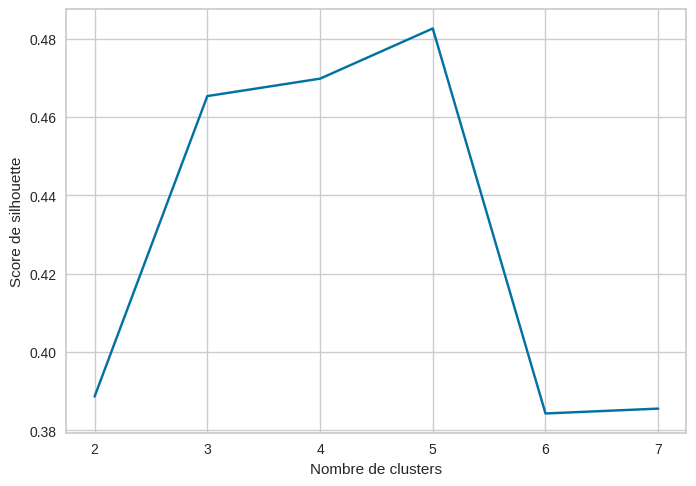

In [ ]:
# Tracer le nombre de clusters en fonction du score de silhouette
plt.plot(range(2, 8), silhouette_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()

# Visualisation calinski_harabaz

In [ ]:
from sklearn.metrics import calinski_harabasz_score
# Initialiser une liste pour stocker les scores Calinski-Harabasz pour chaque nombre de clusters
ch_scores = []

# Itérer sur différents nombres de clusters pour le clustering agglomératif
for n_clusters in range(2, 8):
    # Créer un objet AgglomerativeClustering pour le clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    # Exécuter le clustering sur les données
    clustering_labels = clustering.fit_predict(segment_1_scaled)
    # Calculer le score Calinski-Harabasz pour les clusters
    ch_score = calinski_harabasz_score(segment_1_scaled, clustering_labels)
    # Ajouter le score Calinski-Harabasz à la liste
    ch_scores.append(ch_score)

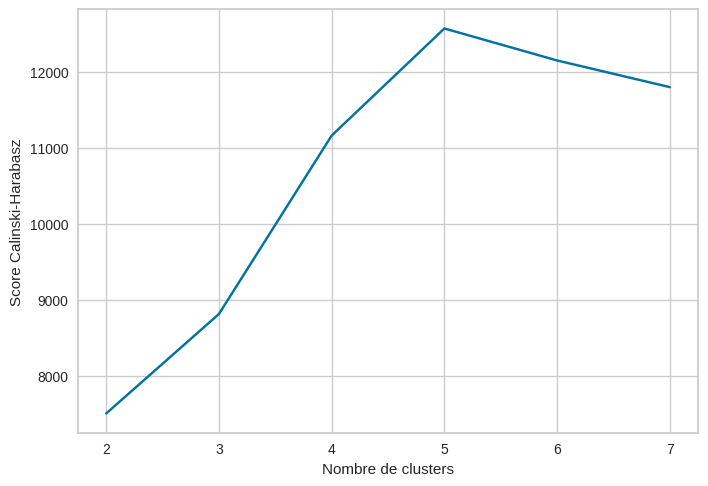

In [ ]:
# Tracer le nombre de clusters en fonction du score Calinski-Harabasz
plt.plot(range(2, 8), ch_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score Calinski-Harabasz')
plt.show()

# Dendogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


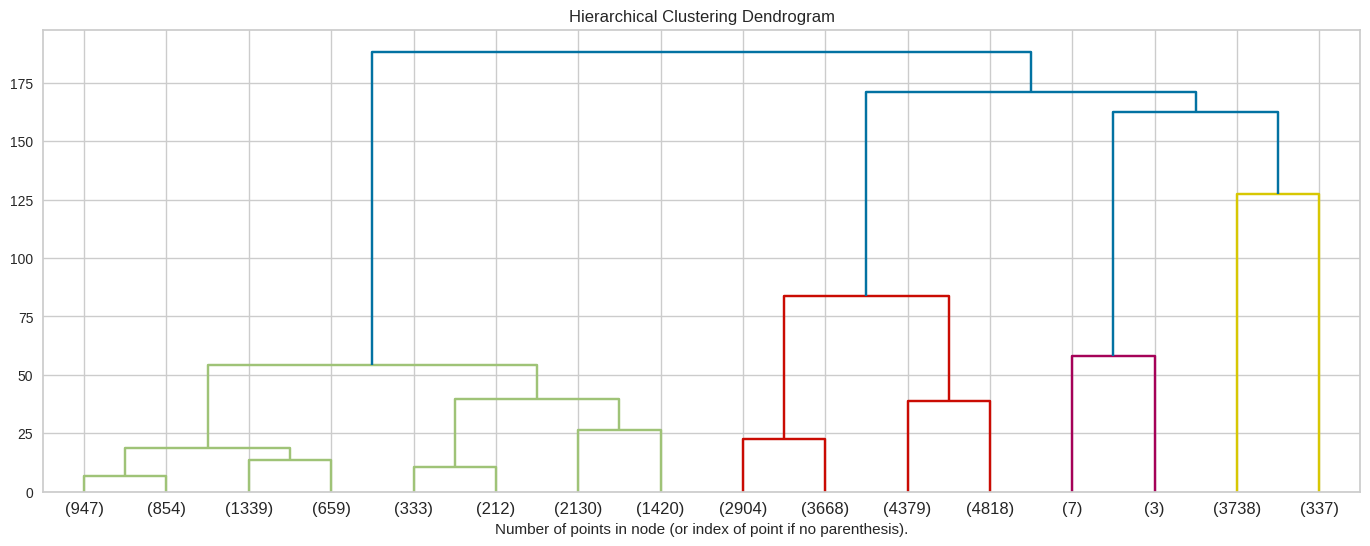

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(segment_1_scaled)

plt.figure(figsize=(17, 6))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
for nb_clusters in range(3, 6):
    model = AgglomerativeClustering(n_clusters=nb_clusters).fit(segment_1_scaled)
    labels = model.labels_
    segment_1_sample_x['cluster{}'.format(nb_clusters)] = labels
segment_1_sample_x

,recency,frequency,montant,cluster3,cluster4,cluster5
90551,457,1,63.00,1,3,3
83244,142,1,83.50,2,2,0
35346,463,1,367.20,1,3,3
40394,97,2,74.75,0,0,1
44829,295,1,163.65,2,2,0
...,...,...,...,...,...,...
61767,485,1,95.76,1,3,3
56895,230,1,189.63,2,2,0
86342,9,1,88.62,2,2,0
68169,71,3,62.65,0,0,1


In [ ]:
segment_1_sample_x.groupby('cluster5').agg({'recency' : 'mean',
                                'frequency' : 'mean',
                                'montant' : 'mean',
                                })

,recency,frequency,montant
cluster5,,,
0,148.967658,1.000000,133.193755
1,208.274746,2.157036,507.002084
2,226.836795,5.643917,1988.177329
3,426.731822,1.069040,135.423547
4,195.900000,9.800000,20569.405000


# Visualisation 3D des clusters 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import plotly.express as px
fig = px.scatter_3d(segment_1_sample_x, x="recency", y="frequency", z="montant", color="cluster5")
fig.show()

**Représentation des types de clients par profil**

- Cluster 0 : des clients actifs et fidèles, avec une fréquence d'achat élevée et un montant moyen d'achat élevé.

- Cluster 1 : des clients inactifs et peu fidèles, avec une fréquence d'achat très faible et un montant moyen d'achat faible.

- Cluster 2 : des clients inactifs mais fidèles, avec une fréquence d'achat très faible mais un montant moyen d'achat relativement élevé.

- Cluster 3 : des clients actifs et très fidèles, avec une fréquence d'achat très élevée et un montant moyen d'achat très élevé.

- Cluster 4 : des clients actifs et assez fidèles, avec une fréquence d'achat élevée mais un montant moyen d'achat plutôt faible.

In [ ]:
segment_1_sample_x['profil client_cluster5'] = segment_1_sample_x['cluster5'].map({ 0: 'Bon client', 1:'Client inactif', 2:'Client actif et peu engagé', 3 :'Très bon client', 4: 'client actif peu dépensier', 5 :'client '})

In [ ]:
import colorlover as cl
#colors = cl.scales['9']['seq']['Blues']
colors = ['#FF0000', '#ff8000', '#00FF00', '##50C878']
fig = go.Figure( data = [go.Pie(values = segment_1_sample_x['profil client_cluster5'].value_counts().values,
                                labels = segment_1_sample_x['profil client_cluster5'].value_counts().index,
                                title = 'profil client_cluster5',
                                hole = .5,
                                textinfo='label+percent',
                                marker=dict(colors=colors),)
                                
                        ])
fig.update_layout(width=800, height=600)

fig.show()


#Radar Plot

In [ ]:
data=segment_1_sample_x.groupby('cluster5').agg({'recency' :  'mean',
                            'frequency' : 'mean',
                            'montant' :  'mean',
                           }).reset_index()

data

,cluster5,recency,frequency,montant
0,0,148.967658,1.000000,133.193755
1,1,208.274746,2.157036,507.002084
2,2,226.836795,5.643917,1988.177329
3,3,426.731822,1.069040,135.423547
4,4,195.900000,9.800000,20569.405000


In [ ]:
data

import pandas as pd
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Charger les données
df = data

# Sélectionner les variables à visualiser
variables = ['recency', 'frequency', 'montant']

# Créer le scaler
scaler = MinMaxScaler()

# Appliquer le scaler sur les données
scaled_data = scaler.fit_transform(df[variables])

# Créer le dataframe avec les données scalées
df_scaled = pd.DataFrame(scaled_data, columns=variables)

# Ajouter la colonne cluster
df_scaled['cluster'] = df['cluster5'].values

# Créer un dataframe pour chaque cluster
clusters = df_scaled.groupby('cluster')

# Récupérer les noms des clusters
cluster_names = df_scaled['cluster'].unique()

# Créer la figure Plotly
fig = go.Figure()

# Parcourir les clusters et ajouter chaque radar plot à la figure
for i, cluster in enumerate(clusters):
    data = cluster[1][variables].mean().values.flatten().tolist()
    data += data[:1]
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=variables + [variables[0]],
        fill='toself',
        name=f'Cluster {cluster_names[i]}'
    ))

# Ajouter le titre et les étiquettes des axes
fig.update_layout(
    title='Radar plot des clusters',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        ),
    ),
    showlegend=True,

    width=800,
    height=600
)

# Afficher la figure
fig.show()


# Projection sur les plans factoriels

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
pca.fit (segment_1_scaled)
print( pca.explained_variance_ratio_.cumsum() )

[0.47454818 0.80788452]


Les axes explique 79% de la variance 

In [ ]:
X_trans =pca.transform (segment_1_scaled)

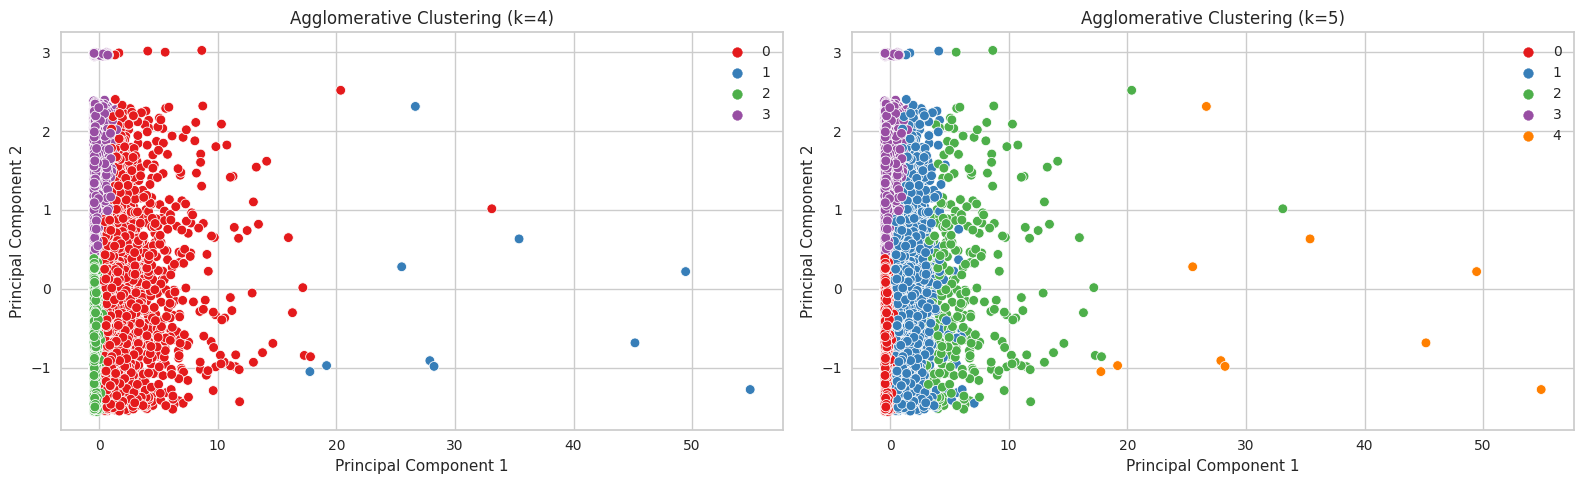

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(16,5))
# Agg Clustering with k=4
cls4 = AgglomerativeClustering( n_clusters=4)
cls4.fit(segment_1_scaled)

# Plot 1 - K-Means Clustering (k=4)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=cls4.labels_, palette='Set1')
sns.set_style("whitegrid")
plt.title('Agglomerative Clustering (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Agg Clustering with k=3
cls3 = AgglomerativeClustering( n_clusters=5)
cls3.fit(segment_1_scaled)

# Plot 2 - K-Means Clustering (k=3)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=cls3.labels_, palette='Set1')
sns.set_style("whitegrid")
plt.title('Agglomerative Clustering (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#<ins> Agglomerative clustering  pour ma deuxième table (segment_2) </ins>

In [ ]:
# StandardScaler
scaler = StandardScaler()

In [ ]:
segment_2_copy=segment_2.drop(['customer_unique_id'], axis=1).copy()
segment_2_sample_x = segment_2_copy.sample(frac = .30, random_state = 42) # faire le cluster avec l'ensemble des données
segment_2_scaled = scaler.fit_transform (segment_2_sample_x)

# silouhette score en fonction du nombre de cluster 

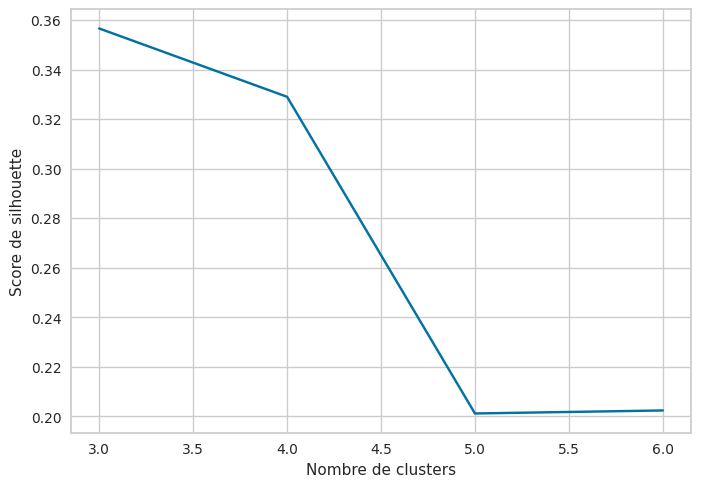

CPU times: user 5min 30s, sys: 23.5 s, total: 5min 54s
Wall time: 5min 44s


In [ ]:
%%time
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialiser une liste pour stocker les scores de silhouette pour chaque nombre de clusters
silhouette_scores = []

# Itérer sur différents nombres de clusters pour le clustering agglomératif
for n_clusters in range(3, 7):
    # Créer un objet AgglomerativeClustering pour le clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    # Exécuter le clustering sur les données
    clustering_labels = clustering.fit_predict(segment_2_scaled)
    # Calculer le score de silhouette pour les clusters
    silhouette_avg = silhouette_score(segment_2_scaled, clustering_labels)
    # Ajouter le score de silhouette à la liste
    silhouette_scores.append(silhouette_avg)

# Tracer le nombre de clusters en fonction du score de silhouette
plt.plot(range(3, 7), silhouette_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.show()

In [ ]:
silhouette_scores

[0.3565593366136975,
 0.3289889104571379,
 0.20120792734550758,
 0.20242535083000404]

# calinski_harabasz_score en fonction du nombre de cluster

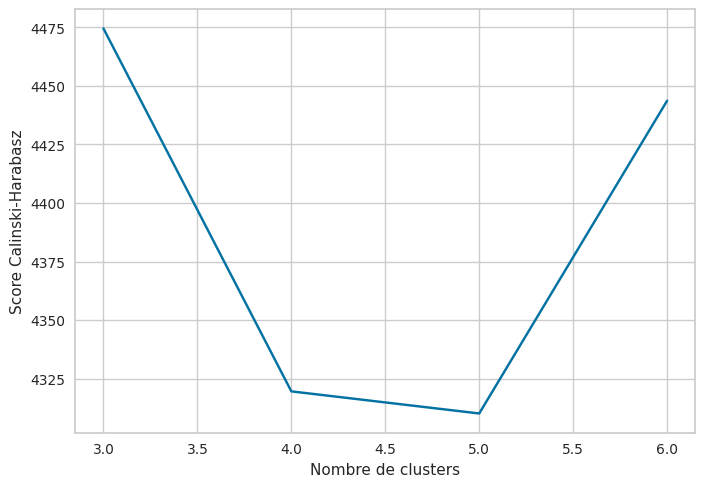

CPU times: user 5min 26s, sys: 12.6 s, total: 5min 39s
Wall time: 5min 38s


In [ ]:
%%time
from sklearn.metrics import calinski_harabasz_score
# Initialiser une liste pour stocker les scores Calinski-Harabasz pour chaque nombre de clusters
ch_scores = []

# Itérer sur différents nombres de clusters pour le clustering agglomératif
for n_clusters in range(3, 7):
    # Créer un objet AgglomerativeClustering pour le clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    # Exécuter le clustering sur les données
    clustering_labels = clustering.fit_predict(segment_2_scaled)
    # Calculer le score Calinski-Harabasz pour les clusters
    ch_score = calinski_harabasz_score(segment_2_scaled, clustering_labels)
    # Ajouter le score Calinski-Harabasz à la liste
    ch_scores.append(ch_score)

# Tracer le nombre de clusters en fonction du score Calinski-Harabasz
plt.plot(range(3, 7), ch_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score Calinski-Harabasz')
plt.show()

# Dendogramme 

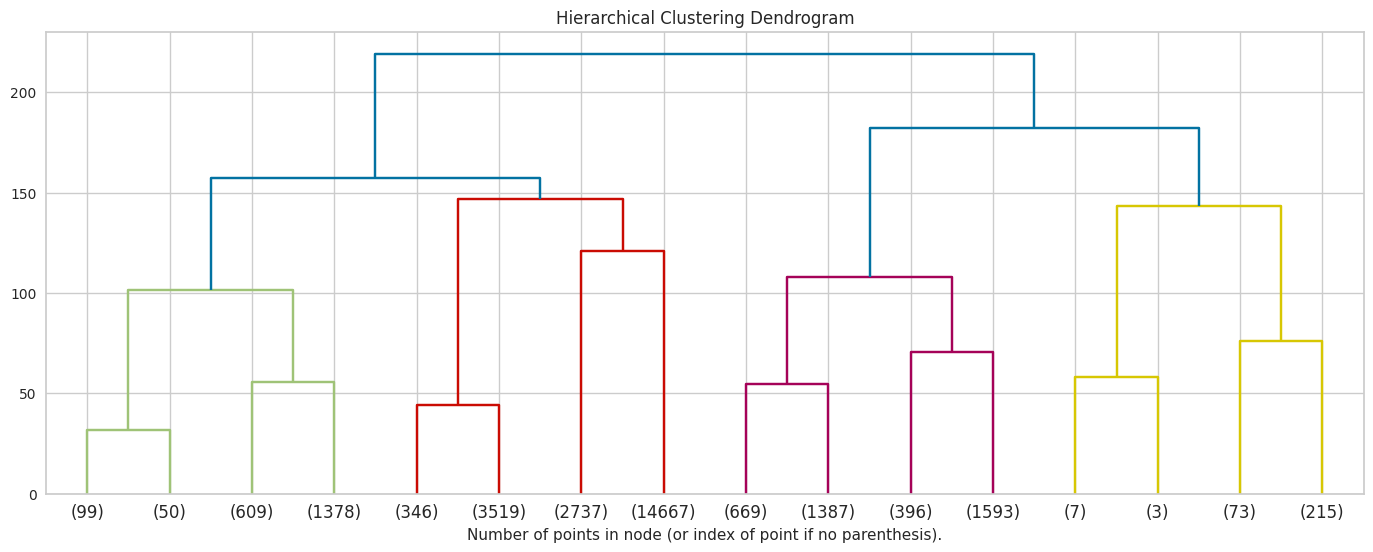

CPU times: user 1min 23s, sys: 3.11 s, total: 1min 26s
Wall time: 1min 26s


In [ ]:
%%time
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(segment_2_scaled)

plt.figure(figsize=(17, 6))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Choix du nombre de cluster et caractérisation

In [ ]:
%%time
for nb_clusters in range(3, 7):
    model = AgglomerativeClustering(n_clusters=nb_clusters).fit(segment_2_scaled)
    labels = model.labels_
    segment_2_sample_x['cluster{}'.format(nb_clusters)] = labels
segment_2_sample_x

,recency,frequency,montant,note_com,frais_livraison,temps_moyen_livraison,cluster3,cluster4,cluster5,cluster6
90551,457,1,63.00,4.0,14.10,5.0,0,0,4,4
83244,142,1,83.50,5.0,23.00,8.0,0,0,1,0
35346,463,1,367.20,5.0,17.21,1.0,0,0,4,4
40394,97,2,74.75,4.0,7.39,3.0,0,0,1,0
44829,295,1,163.65,1.0,16.66,7.0,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
61767,485,1,95.76,5.0,15.77,10.0,0,0,4,4
56895,230,1,189.63,5.0,19.73,14.0,0,0,1,0
86342,9,1,88.62,5.0,8.72,4.0,0,0,1,0
68169,71,3,62.65,5.0,7.65,2.0,0,0,1,0


In [ ]:
segment_2_sample_x.groupby('cluster5').agg({'recency' : 'mean',
                                'frequency' : 'mean',
                                'montant' : 'mean',
                                'note_com':'mean',
                                'frais_livraison':'mean',
                                'temps_moyen_livraison':'mean'
                                })

,recency,frequency,montant,note_com,frais_livraison,temps_moyen_livraison
cluster5,,,,,,
0,232.614094,5.859060,2952.531309,3.445598,24.375438,11.107383
1,189.895484,1.212825,158.493951,4.597528,16.583259,10.281142
2,231.140173,1.299382,210.414630,1.613782,21.024226,20.753770
3,212.068820,1.069757,458.737669,4.489700,53.726383,12.926030
4,468.932730,1.002846,121.856538,4.661708,16.509380,9.931177


- Cluster 0 : Les clients de ce cluster sont des clients **"fidèles"** qui ont tendance à faire des achats fréquents et dépensent davantage sur chaque achat. Ils sont satisfaits de leurs achats et sont disposés à attendre un temps raisonnable pour la livraison. Cependant, ils peuvent être considérés comme des "clients inactifs" s'ils ne font pas d'achat pendant de longues périodes.

- Cluster 1 : Les clients de ce cluster sont des clients **"réguliers"** qui achètent moins souvent, mais ont tendance à donner des notes de satisfaction plus élevées pour leurs achats. Ils sont également moins dépensiers que ceux du Cluster 0, mais sont disposés à payer des frais de livraison raisonnables pour leurs achats. Ils peuvent également être considérés comme des "clients fidèles", car ils achètent régulièrement.

- Cluster 2 : Les clients de ce cluster ont une "période d'inactivité" élevée, une fréquence d'achat faible et des notes de satisfaction très basses. Ils sont moins dépensiers que ceux des clusters 0 et 1 et ont tendance à payer des frais de livraison plus élevés. Ils peuvent être considérés comme des **"clients en danger"**, car leur insatisfaction et leur faible fréquence d'achat pourraient conduire à une perte de clientèle.

- Cluster 3 : Les clients de ce cluster ont une "longue période d'inactivité", mais ont tendance à acheter avec une fréquence similaire à celle du cluster 1. Ils dépensent moins que ceux du cluster 0, mais ont des notes de satisfaction élevées pour leurs achats. Ils peuvent également être considérés comme des **"clients dormants"** qui pourraient être réactivés avec des incitations ou des promotions.

- Cluster 4 : Les clients de ce cluster ont une "période d'inactivité" similaire à celle du cluster 1, mais achètent légèrement moins souvent. Ils dépensent plus que ceux des autres clusters et ont des notes de satisfaction élevées pour leurs achats. Cependant, ils sont plus sensibles aux frais de livraison élevés et peuvent être considérés comme des **"clients à fidéliser"** qui pourraient être fidélisés avec des réductions de frais de livraison ou d'autres promotions avantageuses.

In [ ]:
segment_2_sample_x['cluster4'].value_counts()

0    21269
2     4045
3     2136
1      298
Name: cluster4, dtype: int64

In [ ]:
segment_2_sample_x.groupby('cluster4').agg({'recency' : 'mean',
                                'frequency' : 'mean',
                                'montant' : 'mean',
                                'note_com':'mean',
                                'frais_livraison':'mean',
                                'temps_moyen_livraison':'mean'
                                })

,recency,frequency,montant,note_com,frais_livraison,temps_moyen_livraison
cluster4,,,,,,
0,240.602097,1.174667,151.836205,4.609191,16.569833,10.217547
1,232.614094,5.859060,2952.531309,3.445598,24.375438,11.107383
2,231.140173,1.299382,210.414630,1.613782,21.024226,20.753770
3,212.068820,1.069757,458.737669,4.489700,53.726383,12.926030


Représentation par profil de clients 

In [ ]:
segment_2_sample_x['profil client_cluster5'] = segment_2_sample_x['cluster5'].map({ 0: 'fidèles', 1:'réguliers', 2:'clients en danger', 3 :'clients dormants', 4: 'clients à fidéliser'})

#colors = cl.scales['9']['seq']['Blues']
colors = ['#FF0000', '#ff8000', '#00FF00', '##50C878']
fig = go.Figure( data = [go.Pie(values = segment_2_sample_x['profil client_cluster5'].value_counts().values,
                                labels = segment_2_sample_x['profil client_cluster5'].value_counts().index,
                                title = 'profil client_cluster5',
                                hole = .5,
                                textinfo='label+percent',
                                marker=dict(colors=colors),)
                                
                        ])
fig.update_layout(width=800, height=600)

fig.show()



In [ ]:
data=segment_2_sample_x.groupby('cluster5').agg({'recency' : 'mean',
                                'frequency' : 'mean',
                                'montant' : 'mean',
                                'note_com':'mean',
                                'frais_livraison':'mean',
                                'temps_moyen_livraison':'mean'
                                }).reset_index()
data

,cluster5,recency,frequency,montant,note_com,frais_livraison,temps_moyen_livraison
0,0,232.614094,5.859060,2952.531309,3.445598,24.375438,11.107383
1,1,189.895484,1.212825,158.493951,4.597528,16.583259,10.281142
2,2,231.140173,1.299382,210.414630,1.613782,21.024226,20.753770
3,3,212.068820,1.069757,458.737669,4.489700,53.726383,12.926030
4,4,468.932730,1.002846,121.856538,4.661708,16.509380,9.931177


In [ ]:
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

# Charger les données
df = data

# Sélectionner les variables à visualiser
variables = ['recency', 'frequency', 'montant','note_com','frais_livraison','temps_moyen_livraison']

# Créer le scaler
scaler = MinMaxScaler()

# Appliquer le scaler sur les données
scaled_data = scaler.fit_transform(df[variables])

# Créer le dataframe avec les données scalées
df_scaled = pd.DataFrame(scaled_data, columns=variables)

# Ajouter la colonne cluster
df_scaled['cluster'] = df['cluster5'].values

# Créer un dataframe pour chaque cluster
clusters = df_scaled.groupby('cluster')

# Récupérer les noms des clusters
cluster_names = df_scaled['cluster'].unique()

# Créer la figure Plotly
fig = go.Figure()

# Parcourir les clusters et ajouter chaque radar plot à la figure
for i, cluster in enumerate(clusters):
    data = cluster[1][variables].mean().values.flatten().tolist()
    data += data[:1]
    fig.add_trace(go.Scatterpolar(
        r=data,
        theta=variables + [variables[0]],
        fill='toself',
        name=f'Cluster {cluster_names[i]}'
    ))

# Ajouter le titre et les étiquettes des axes
fig.update_layout(
    title='Radar plot des clusters',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        ),
    ),
    showlegend=True,

    width=800,
    height=600
)

# Afficher la figure
fig.show()


# Projection sur le plan factoriel

In [ ]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=2)
pca.fit (segment_2_scaled)
print( pca.explained_variance_ratio_.cumsum() )

[0.2590306  0.48014495]


In [ ]:
X_trans =pca.transform (segment_2_scaled)

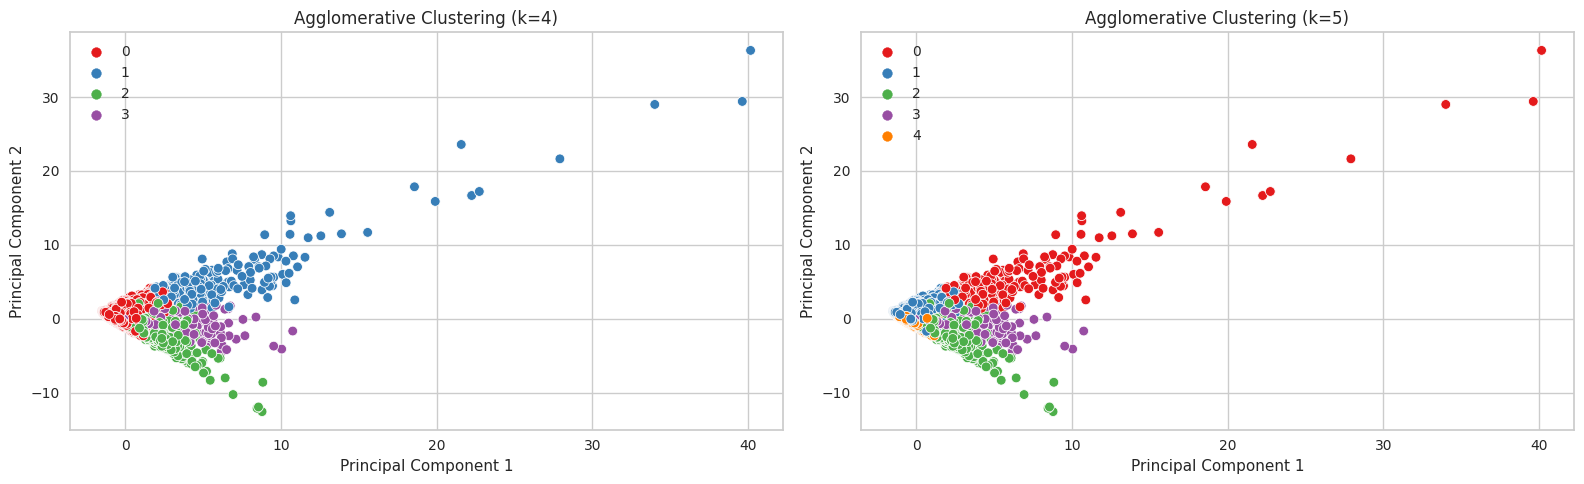

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(16,5))
# Agg Clustering with k=4
cls4 = AgglomerativeClustering(n_clusters=4)
cls4.fit(segment_2_scaled)

# Plot 1 - Agg Clustering (k=4)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=cls4.labels_, palette='Set1')
sns.set_style("whitegrid")
plt.title('Agglomerative Clustering (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Agg Clustering with k=3
cls3 = AgglomerativeClustering(n_clusters=5)
cls3.fit(segment_2_scaled)

# Plot 2 - Agg Clustering (k=3)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=cls3.labels_, palette='Set1')
sns.set_style("whitegrid")
plt.title('Agglomerative Clustering (k=5)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Adjust layout and show plot
plt.tight_layout()
plt.show()
